### Importing Modules

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

### Loading datasets

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
dataset = pd.concat(objs=[train_df, test_df],axis=0)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### Data Stats and Analysis

* Let us rely on the stats and stories unfolded from our data.
* Data analysis helps us to have an idea of important features, other probable contributing features, non-essential features etc.
* This ultimately helps to prepare our data so as to obtain best possible results in predictions.

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


* There are 7 columns of numeric data --> *PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare*.
* Rest 5 are of categorical data --> *Name, Sex, Ticket, Cabin, Embarked* 
* Non-Null count above suggests that there might be null values in the data.

In [6]:
print("Train set dimensions: ",train_df.shape)
train_df.nunique()

Train set dimensions:  (891, 12)


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

* There are 891 samples in the train data.
* There are 891 distinct values of *'PassengerId'* column. Thus the basic intuitive thought that it doesn't contribute anything to analysis, is confirmed statistically.
* Thus we may drop *'PassengerId'* column.
* Similarly, there are 891 distinct values of *'Name'* column.

In [7]:
train_df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

* Though the *'Name'* directly may not contribute to the analysis, we might engineer the column to extract features like 'Saluation', which might turn out to be useful in the analysis.

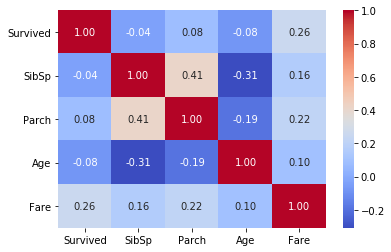

In [8]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
g = sns.heatmap(train_df[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

* *Fare* appears to be somewhat correlated to the Survival probability.
* Let us dig deeper to find if any hidden insights would turn up.

In [9]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

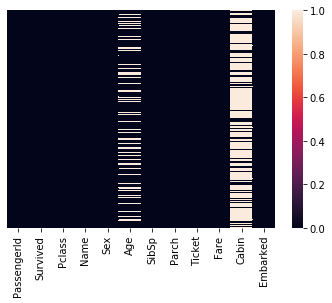

In [10]:
# visualizing the missing data

sns.heatmap(train_df.isnull(), yticklabels=False)

* *Age* and *Cabin* are apparently having missing data.
* *Cabin* has most of the data to be missing.

In [11]:
train_df.isnull().sum() * 100 / len(train_df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

* There are about 
    * 0.2% values to be missing *'Embarked'* column.
    * 20% values to be missing *'Age'* column. 
    * 80% values to be missing *'Cabin'* column.


#### Age

* Let us visualize the distribution of *Age* data.

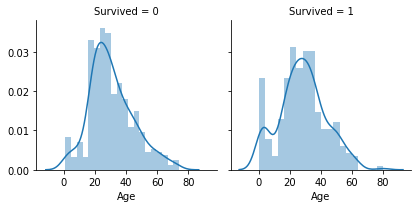

In [12]:
age_plot = sns.FacetGrid(train_df, col='Survived')
age_plot.map(sns.distplot, 'Age', bins=20)

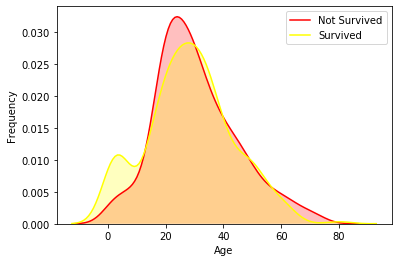

In [13]:
# Explore Age distibution 
g = sns.kdeplot(train_df["Age"][(train_df["Survived"] == 0) & (train_df["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train_df["Age"][(train_df["Survived"] == 1) & (train_df["Age"].notnull())], ax =g, color="Yellow", shade = True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

* We could see a small peak for the younger(nearly of ages <15) ages to survive.
* From the correlation matrix of numerical data, it is evident that the age is not greatly correlated with the survival probability.
* But from the above plots of age, it is perceptible that subpopulation of age (children) have more chances of being survived.
* This is an interesting observation, and thus we should retain age in our data and impute the missing values.
* Let us further continue our data analysis.

#### Parch

C:\Users\Anjan rao\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Anjan rao\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


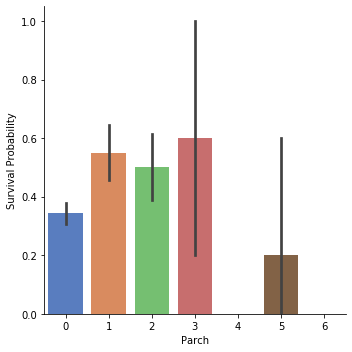

In [27]:
g  = sns.factorplot(x="Parch",y="Survived",data=train_df,kind="bar", size = 5, palette = "muted")
g = g.set_ylabels("Survival Probability")

* Medium sized families with size 1<=Parents/children<=3 had more chances of survival. Being short families they might have managed to rescue themselves well and fast.
* Nevertheless, families with 3 arents/children depict a high varibility of survaival.
* 0 parents/children had lesser chances of survival. This might have been so as they didn't have their own people to save them.
* Larger families with 4<=Parents/children<=6 had very poor rate of survival.

#### SibSp

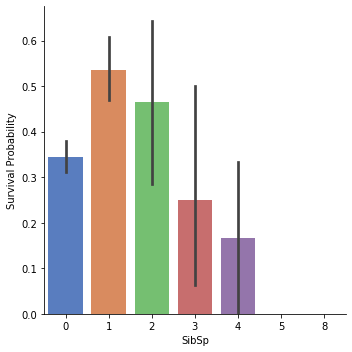

In [60]:
g  = sns.factorplot(x="SibSp",y="Survived",data=train_df,kind="bar", size = 5, palette = "muted")
g = g.set_ylabels("Survival Probability")

* People with 1 or 2 siblings/spouse  had greater chances of survival.
* Larger number of siblings/spouse had less chances of survival.

* Observing the above obtained insights from *SibSp* and *Parch* features:
    * we could make out that larger families might have had greater difficulties escaping from the danger and save themselves. 
    * So, I feel that it would be reasonable to combine these to features to makeout a new feature representing the family size as a whole.

#### Fare

In [38]:
dataset["Fare"].isnull().sum()

1

* Since *Fare* is a numerical column, let us impute the missing value with median.

In [39]:
dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].median())

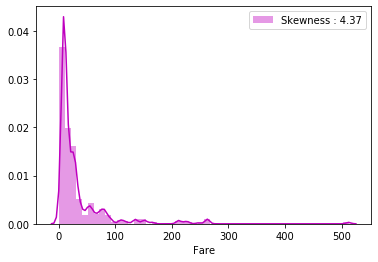

In [40]:
g = sns.distplot(dataset["Fare"], color="m", label="Skewness : %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

* The *Fare* data is quite skewed, this might lead to overweighed impression of the feature in the modeling.
* Let us log-transform the data to reduce skewness.

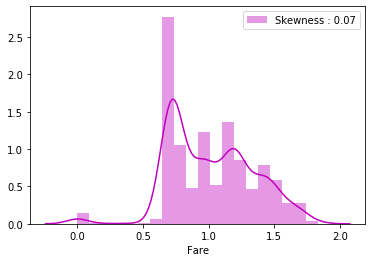

In [42]:
dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

g = sns.distplot(dataset["Fare"], color="m", label="Skewness : %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

* This chart depicts an obvious reduction in the skewness of the *Fare*.

#### Sex

In [100]:
dataset["Sex"].isnull().sum()

0

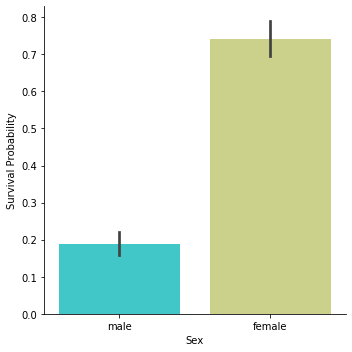

In [61]:
g  = sns.factorplot(x="Sex",y="Survived",data=train_df,kind="bar", size = 5, palette = "rainbow")
g = g.set_ylabels("Survival Probability")

* Females had quite a bigger probability of survival as compared to males.

#### Pclass

In [99]:
dataset["Pclass"].isnull().sum()

0

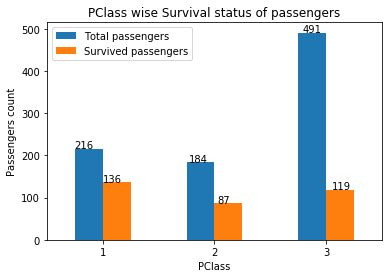

In [50]:
pclass_count = list(train_df['Pclass'].value_counts().sort_index())
survived_df = train_df[train_df.Survived==1]
survived_count = list(survived_df.Pclass.value_counts().sort_index())
index = sorted(train_df.Pclass.unique())
df = pd.DataFrame({'Total passengers':pclass_count,'Survived passengers':survived_count},index=index,columns=['Total passengers','Survived passengers'])
ax = df.plot.bar(rot=0)
ax.set_xlabel("PClass")
ax.set_ylabel("Passengers count")
ax.set_title("PClass wise Survival status of passengers")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.025, p.get_height() * 1.005))

* About 63% of *Pclass 1*, 47% of *Pclass 2* and 24% of *Pclass 3* are survived.
* So higher class people (socio-economically strong) have survived the most.

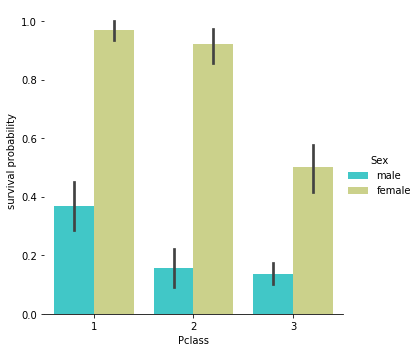

In [62]:
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=train_df,size=5, kind="bar", palette="rainbow")
g.despine(left=True)
g = g.set_ylabels("survival probability")

* Females of the three Pclasses has higher probability of survival when compared to males.

#### Embarked

In [74]:
dataset["Embarked"].isnull().sum()

2

* Since this is a categorical variable, let us impute the missing values with mode.

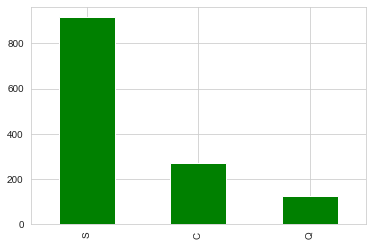

In [89]:
dataset["Embarked"].value_counts().plot(kind='bar', color='g')

In [81]:
dataset["Embarked"] = dataset["Embarked"].fillna(dataset["Embarked"].mode())

Text(0.5, 1.0, 'Survival probability based on the Embarked')

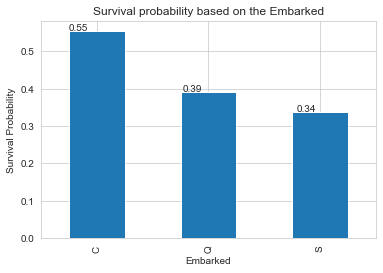

In [92]:
plt = train_df[['Embarked', 'Survived']].groupby('Embarked').mean().Survived.plot(kind='bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Survival Probability')
for p in plt.patches:
    plt.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.025, p.get_height() * 1.005))
plt.set_title("Survival probability based on the Embarked")

* The order of higher survival probability is C>Q~S.
* Thus the passengers from Cherbourg(C) had higher survival probability.

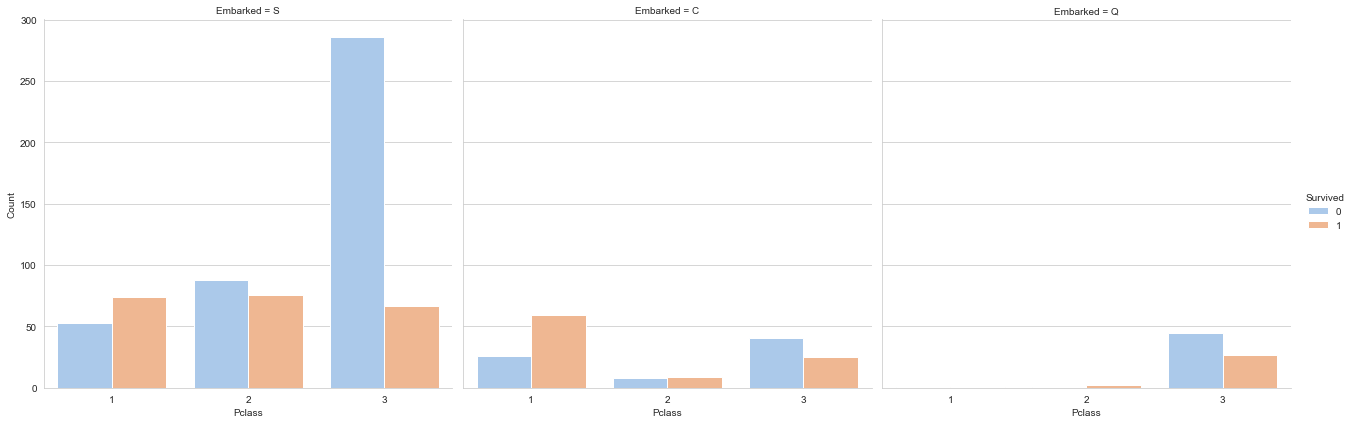

In [85]:
g = sns.factorplot("Pclass", col="Embarked",hue='Survived',  data=train_df, size=6, kind="count", palette="pastel")
g = g.set_ylabels("Count")

* As evident from both Pclass and Embarked, 
    * 1st class people had more survival probabilities than non.survival probabilities.
    * At port C, more people boarded into 1st class, conforming to the insight that the more people from C had survived.

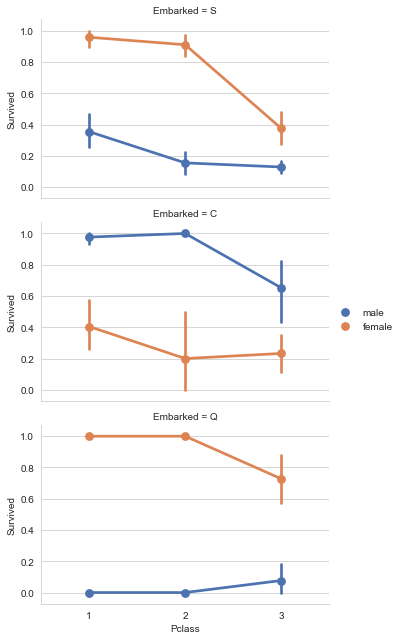

In [98]:
grid = sns.FacetGrid(train_df, row='Embarked', size=3, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

* These plots point an exception where males had a higher probability of survival than females in Embarked=C.
* This might be due to the correlation between Embarked and Pclass, and in return that in between Pclass and Survived.

### Imputing Missing Data